In [153]:
import numpy as np
from scipy.spatial import cKDTree
import pyvista as pv
import matplotlib.pyplot as plt
import mayavi
import pandas as pd
import trimesh
import pymesh
import open3d as o3d
import vtk

In [100]:
# Load meshes (replace with your file paths)
mesh1 = pv.read("C:\\Users\\diton\\Desktop\\skull_cut.stl")
mesh2 = pv.read("C:\\Users\\diton\\Desktop\\skin_cut.stl")

In [90]:
pymesh.LaplacianFilter(mesh1)
# Apply Laplacian smoothing directly
pymesh.laplacian_filter(mesh1)

# Decimate to reduce face count (optional, adjust parameters)
decimate = pymesh.Decimate(mesh=mesh1, target_face_count=target_face_count)
decimate.run()  # Ensure proper indentation

# Store the smoothed and decimated mesh
remeshed_mesh1 = decimate.mesh

AttributeError: module 'pymesh' has no attribute 'LaplacianFilter'

In [2]:
# Calculate the distances from vertices of mesh1 to mesh2 based on the closest distance

# Create k-d tree for mesh1
tree = cKDTree(mesh1.points)

# List to store distances
distances = []

# Iterate through vertices of mesh2 and find closest points
for point in mesh2.points:
    _, idx = tree.query(point)
    closest_point = mesh1.points[idx]
    distance = np.linalg.norm(point - closest_point)
    distances.append(distance)

In [45]:
# Print minimum, maximum, and average distances
print(f"Minimum distance: {min(distances)}")
print(f"Maximum distance: {max(distances)}")
print(f"Average distance: {np.mean(distances)}")


Minimum distance: 1.7392804622650146
Maximum distance: 27.277362823486328
Average distance: 8.333407402038574


In [46]:
interval_0_5 = []
interval_5_10 = []
interval_10_15 = []
interval_15_20 = []
interval_20_25 = []
interval_25_30 = []
interval_30_35 = []
interval_35_40 = []
interval_40m = []

for value in distances:
    if 0 < value < 5:
        interval_0_5.append(value)
    elif 5 <= value < 10:
        interval_5_10.append(value)
    elif 10 <= value < 15:
        interval_10_15.append(value)
    elif 15 <= value < 20:
        interval_15_20.append(value)
    elif 20 <= value < 25:
        interval_20_25.append(value)
    elif 25 <= value < 30:
        interval_25_30.append(value)
    elif 30 <= value < 35:
        interval_30_35.append(value)
    elif 35 <= value < 40:
        interval_35_40.append(value)
    else:
        interval_40m.append(value)


In [47]:
print(f"Count of distances (0, 5): {len(interval_0_5)} Average distance (0, 5): {np.mean(interval_0_5)}")
print(f"Count of distances [5, 10): {len(interval_5_10)}"), print(f"Average distance [5, 10): {np.mean(interval_5_10)}")
print(f"Count of distances [10, 15): {len(interval_10_15)}"), print(f"Average distance [10, 15): {np.mean(interval_10_15)}")
print(f"Count of distances [15, 20): {len(interval_15_20)}"), print(f"Average distance [15, 20): {np.mean(interval_15_20)}")
print(f"Count of distances [20, 25): {len(interval_20_25)}"), print(f"Average distance [20, 25): {np.mean(interval_20_25)}")
print(f"Count of distances [25, 30): {len(interval_25_30)}"), print(f"Average distance [25, 30): {np.mean(interval_25_30)}")
print(f"Count of distances [30, 35): {len(interval_30_35)}"), print(f"Average distance [30, 35): {np.mean(interval_30_35)}")
print(f"Count of distances [35, 40): {len(interval_35_40)}"), print(f"Average distance [35, 40): {np.mean(interval_35_40)}")
print(f"Count of distances [40+]: {len(interval_40m)}"), print(f"Average distance [40+]: {np.mean(interval_40m)}")

Count of distances (0, 5): 26609 Average distance (0, 5): 3.7564890384674072
Count of distances [5, 10): 37061
Average distance [5, 10): 7.465975761413574
Count of distances [10, 15): 14021
Average distance [10, 15): 12.19364070892334
Count of distances [15, 20): 8096
Average distance [15, 20): 16.817119598388672
Count of distances [20, 25): 2000
Average distance [20, 25): 22.006235122680664
Count of distances [25, 30): 216
Average distance [25, 30): 25.837785720825195
Count of distances [30, 35): 0
Average distance [30, 35): nan
Count of distances [35, 40): 0
Average distance [35, 40): nan
Count of distances [40+]: 0
Average distance [40+]: nan


C:\Users\diton\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\diton\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(None, None)

(array([  833.,  8872., 10609.,  7546.,  6227.,  4781.,  7576.,  8020.,
         6358.,  3871.,  2994.,  2636.,  2431.,  2176.,  1821.,  1585.,
         2559.,  1824.,  1460.,   814.,   558.,   516.,   527.,   362.,
          288.,   278.,   204.,   159.,    70.,    48.]),
 array([ 1.73928046,  2.59054995,  3.44181919,  4.29308891,  5.14435816,
         5.9956274 ,  6.84689713,  7.69816637,  8.54943562,  9.40070534,
        10.25197411, 11.10324383, 11.95451355, 12.80578327, 13.65705204,
        14.50832176, 15.35959148, 16.21086121, 17.06212997, 17.91339874,
        18.76466942, 19.61593819, 20.46720695, 21.31847763, 22.1697464 ,
        23.02101517, 23.87228584, 24.72355461, 25.57482338, 26.42609406,
        27.27736282]),
 <BarContainer object of 30 artists>)

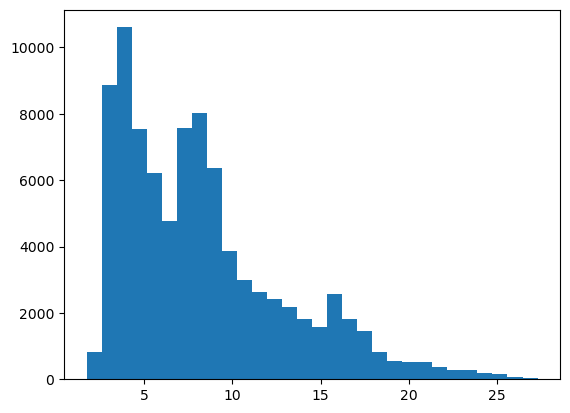

In [48]:
plt.hist(distances, bins=30)

In [53]:
distances_array = np.array(distances)
# points_with_distance = np.reshape(mesh1.points, (-1, 3))
points_with_distance = mesh1.points.copy()

print(points_with_distance.shape)
print(distances_array.shape)

(147722, 3)
(88003,)


In [8]:
# Assuming 'mesh1' has points and 'distances_array' holds calculated distances
filtered_points = []
filtered_distances = []

for i, distance in enumerate(distances_array):
  if not np.isnan(distance):  # Check if distance is not NaN
    filtered_points.append(mesh1.points[i])
    filtered_distances.append(distance)
      
filtered_points_array = np.array(filtered_points)
filtered_distances_array = np.array(filtered_distances)


In [9]:
# # Convert filtered points and distances to NumPy arrays
# filtered_points_array = [point[:3] for point in filtered_points]
# filtered_points_array = np.array(filtered_points)

selected_points = []
for point in filtered_points:
  selected_points.append([float(x) for x in point[:3]])  # Convert first 3 elements to floats
filtered_points_array = np.array(selected_points)

filtered_distances_array = np.array(filtered_distances)

# Checking where is the problem!!! But it's not clear....
print(filtered_points_array.shape)
print(filtered_distances_array.shape)
print(distances_array.shape)
print(distances_array.dtype)
print(filtered_points[:5])

(88003, 3)
(88003,)
(88003,)
float32
[pyvista_ndarray([ 12.181999, -55.791283, -31.22261 ], dtype=float32), pyvista_ndarray([ 12.07309 , -56.06076 , -31.318588], dtype=float32), pyvista_ndarray([ 12.107758, -55.95526 , -30.919739], dtype=float32), pyvista_ndarray([ 12.183731, -55.773193, -30.908478], dtype=float32), pyvista_ndarray([ 12.193764, -55.794403, -30.512009], dtype=float32)]


In [10]:
print(filtered_points_array.shape)
combined_array = np.hstack((filtered_points_array, distances_array[:, None]))
print(combined_array.shape)

(88003, 3)
(88003, 4)


In [54]:
# Assuming filtered_points_array is a pandas DataFrame with columns for x, y, z

# filtered_points_array = np.transpose(filtered_points_array)
points = pv.PolyData(np.transpose(filtered_points_array))
if len(distances_array) == len(points):  # Check for matching lengths
    points.point_arrays["distances"] = distances_array
# Assuming filtered_points_array is a pandas DataFrame with columns for x, y, z
# data = pd.DataFrame({"x": filtered_points_array[:, 0], "y": filtered_points_array[:, 1], "z": filtered_points_array[:, 2], "distances": distances_array})
# points = pv.PolyData(data)  # Create PolyData from DataFrame
plotter = pv.Plotter()
plotter.add_mesh(points, scalars = "distances", cmap = "plasma")  # "plasma" colormap
plotter.show()

ValueError: Points array must contain three values per point. Shape is (3, 88003) and should be (X, 3)

In [ ]:
# Just checking. Not to the project
sample_points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Sample points
sample_distances = np.array([10, 20, 30])  # Sample distances

sliced_points_2 = sample_points[:, :3]  # Slice to get x, y, z
combined_array = np.hstack((sliced_points_2, sample_distances[:, None]))

print(combined_array.shape)
print(sliced_points_2.shape)

In [ ]:
try:
  mesh1_colored = pv.PolyData(np.hstack((filtered_points_array, distances_array[:, None])))
except Exception as e:
  print(f"Error creating PolyData: {e}")

In [55]:
mesh1_colored = pv.PolyData(np.hstack((filtered_points_array, distances_array[:, None])))

# Create a PolyData with the points and distances
mesh1_colored = pv.PolyData(points_with_distance)

# Color mapper for the distances
mapper = pv.UniformColorMapping(scalar_range = (min(distances), max(distances)))
mapper.auto_scalars = False  # Avoid automatic range scaling

# Apply the color mapper and scalar field to mesh1
mesh1_colored.scalars = distances_array
mesh1_colored.color(mapper) 

# Plot both meshes with different colors
plotter = pv.Plotter()
plotter.add_mesh(mesh1, color = 'white')  # Original mesh in white
plotter.add_mesh(mesh1_colored, cmap = mapper, show_scalar_bar = True, label = "Distance to mesh2")
plotter.show()

ValueError: Points array must contain three values per point. Shape is (88003, 4) and should be (X, 3)

In [116]:
# Second approach for calculating the mesh-to-mesh distances 

distances = []  # Store distances between each mesh1 vertex and mesh2

for point_id in range(len(mesh1.points)):
    # Get vertex and normal from mesh1
    vertex = mesh1.points[point_id]
    normal = mesh1.point_normals[point_id]

    # Create a ray starting at vertex, extending in negative normal direction
    ray_start = vertex
    ray_end = vertex - 0.2 * normal  # Adjust length as needed

    # Perform ray trace and check for intersection with mesh2
    # This returns a list of intersections (might have multiple)
    intersections = mesh2.ray_trace(ray_start, ray_end)

    # Find the first intersection point (modify for multiple intersections)
    if len(intersections) > 0:
        intersection = intersections[0]  # Assuming the first intersection is relevant
        distance = np.linalg.norm(vertex - intersection)
        
        distances.append(distance)


KeyboardInterrupt: 

In [117]:
# Print minimum, maximum, and average distances from the second approach
print(f"Minimum distance: {min(distances)}")
print(f"Maximum distance: {max(distances)}")
print(f"Average distance: {np.mean(distances)}")
print(f"Length: {len(distances)}")

Minimum distance: 0.0
Maximum distance: 0.0
Average distance: 0.0
Length: 800


In [ ]:
plt.hist(distances, bins=30)

In [147]:
import numpy as np


def calculate_plane_from_vertices(mesh, vertex_indices):
  """
  Calculates the equation of a plane given 5 vertices (assuming a non-degenerate quadrilateral).

  Args:
      mesh: A mesh object from your mesh processing library.
      vertex_indices: A list of indices (length 5) corresponding to the 5 vertices.

  Returns:
      A NumPy array of shape (4,) representing the plane equation (ax + by + cz + d = 0).
      None if the calculation fails (e.g., degenerate case).
  """

  if len(vertex_indices) != 5:
    raise ValueError("Input must be a list of 5 vertex indices.")

  # Get the vertex positions
  vertices = mesh.points[vertex_indices]

  # Calculate two triangle normals (assuming non-degeneracy)
  triangle1_normal = np.cross(vertices[1] - vertices[0], vertices[2] - vertices[0])
  triangle2_normal = np.cross(vertices[2] - vertices[1], vertices[3] - vertices[1])

  # Check if the normals are almost parallel (potential degeneracy)
  if np.allclose(triangle1_normal, triangle2_normal, atol=1e-6):
    print("Warning: Near-parallel normals detected. Plane calculation might be inaccurate.")

  # Take the average of the two normals as the plane normal
  plane_normal = np.mean([triangle1_normal, triangle2_normal], axis=0)

  # Choose one vertex as the reference point on the plane
  plane_point = vertices[0]

  # Plane equation: ax + by + cz + d = 0
  a, b, c = plane_normal
  d = -np.dot(plane_normal, plane_point)

  return np.array([a, b, c, d])


def calculate_planes_for_neighboring_vertices(mesh, num_vertices, neighbor_offset):
  """
  Calculates plane equations and normal vectors for sets of 5 neighboring vertices in a mesh.

  Args:
      mesh: A mesh object from your mesh processing library.
      num_vertices: Total number of vertices in the mesh.
      neighbor_offset: Offset value to define neighboring vertices (e.g., 1 for immediate neighbors).

  Returns:
      A list of tuples, where each tuple contains a NumPy array (4,) for the plane equation and a NumPy array (3,) for the plane normal for a set of 5 vertices.
  """

  plane_equations_with_normals = []
  for vertex_index in range(num_vertices):
    # Define neighboring vertex indices (wrap around if necessary)
    neighbor_indices = [(vertex_index + i) % num_vertices for i in range(1, 6)]

    # Calculate plane equation and normal for this set of neighbors
    plane_equation = calculate_plane_from_vertices(mesh, neighbor_indices)
    if plane_equation is not None:
      plane_normal = plane_equation[:3]  # Extract normal vector from plane equation
      plane_equations_with_normals.append((plane_equation, plane_normal))

  return plane_equations_with_normals


# Example usage (assuming you have loaded your mesh)
num_vertices = len(mesh1.points)
neighbor_offset = 1  # Consider immediate neighbors

plane_equations_with_normals = calculate_planes_for_neighboring_vertices(mesh1, num_vertices, neighbor_offset)

print(f"Number of planes with normals calculated: {len(plane_equations_with_normals)}")
# Access individual plane equations and normals from the list of tuples



Number of planes with normals calculated: 147722


In [148]:
print(plane_equations_with_normals[0])

(array([ 4.9674138e-04, -4.8286282e-05, -2.5706142e-03, -8.9212179e-02],
      dtype=float32), array([ 4.9674138e-04, -4.8286282e-05, -2.5706142e-03], dtype=float32))


In [154]:

def project_point_onto_plane(point, normal, plane_point):
  """
  Projects a point onto a plane defined by a normal vector and a point on the plane.

  Args:
      point: A NumPy array of shape (3,) representing a point in space.
      normal: A NumPy array of shape (3,) representing the plane's normal vector.
      plane_point: A NumPy array of shape (3,) representing a point on the plane.

  Returns:
      The projection of the point onto the plane.
  """

  # Vector from plane point to the point to be projected
  v = point - plane_point

  # Distance from plane point to projection (scalar)
  d = np.dot(v, normal) / np.linalg.norm(normal)

  # Projection of the point onto the plane
  projection = plane_point + d * normal

  return projection


def calculate_perpendicular_distance_to_triangle(plane_normal, plane_point, triangle):
  """
  Calculates the perpendicular distance between a plane and a triangle.

  Args:
      plane_normal: A NumPy array of shape (3,) representing the plane's normal vector.
      plane_point: A NumPy array of shape (3,) representing a point on the plane.
      triangle: A NumPy array of shape (3, 3) representing the triangle vertices.

  Returns:
      The perpendicular distance between the plane and the triangle (or None if no intersection).
  """

  # Calculate triangle centroid
  centroid = np.mean(triangle, axis=0)

  # Project the centroid onto the plane
  projected_centroid = project_point_onto_plane(centroid, plane_normal, plane_point)

  # Perpendicular distance is the distance between the projected point and centroid
  return np.linalg.norm(projected_centroid - centroid)


def calculate_perpendicular_distances_to_mesh2(plane_equations_with_normals, mesh2):
  """
  Calculates perpendicular distances between a list of planes and a mesh.

  Args:
      plane_equations_with_normals: A list of tuples, where each tuple contains a plane equation (4,) and a normal vector (3,).
      mesh2: A mesh object from your mesh processing library.

  Returns:
      A list of distances, where each element corresponds to the perpendicular distance between a plane and mesh2 (or None if no intersection).
  """

  distances = []
  for plane_equation, plane_normal in plane_equations_with_normals:
    plane_point = plane_equation[3] / np.linalg.norm(plane_equation[:3])  # Normalize reference point
    perpendicular_distances = []

    # vtk code to access triangles
    triangles = []
    for i in range(mesh2.GetNumberOfPolys()):
      poly = mesh2.GetCell(i)
      if poly.GetCellType() == vtk.VTK_TRIANGLE:
        points = [mesh2.GetPoint(poly.GetPointId(j)) for j in range(poly.GetNumberOfPoints())]
        triangles.append(np.array(points))

    # Loop through the filtered triangles
    for triangle_index, triangle in enumerate(triangles):
      distance = calculate_perpendicular_distance_to_triangle(plane_normal, plane_point, triangle)
      perpendicular_distances.append(distance)

    # If there's at least one non-None distance, use the minimum value
    if any(dist is not None for dist in perpendicular_distances):
      distances.append(min(dist for dist in perpendicular_distances if dist is not None))
    else:
      distances.append(None)  # No intersection with any triangle

  return distances


# Example usage (assuming you have plane_equations_with_normals and mesh2)
distances = calculate_perpendicular_distances_to_mesh2(plane_equations_with_normals, mesh2)

print(f"Number of distances calculated: {len(distances)}")
# Access individual distances from the list

KeyboardInterrupt: 

In [157]:
print(f"Minimum distance: {min(distances)}")
print(f"Maximum distance: {max(distances)}")
print(f"Average distance: {np.mean(distances)}")
print(f"Length: {len(distances)}")

Minimum distance: 0.0
Maximum distance: 0.0
Average distance: 0.0
Length: 800
